# Algotytm przecinania się odcinków na płaszczyźnie

In [5]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
import matplotlib.pyplot as plt
from enum import Enum
from functools import cmp_to_key
from sortedcontainers import SortedSet

# Przydatne funkcje 

In [6]:
def draw_example_1():
    vis = Visualizer()
    line_segments = [(-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198),
(-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276),
(-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575),
(0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033)]

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


In [7]:
example_line_segments_1 = [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)),
((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)),
((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)),
((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

example_line_segments_2 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)),
((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)),
((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)),
((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)),
((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]

example_line_segments_3 = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)),
((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)),
((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)),
((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)),
((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)),
((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)),
((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)),
((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)),
((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)),
((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

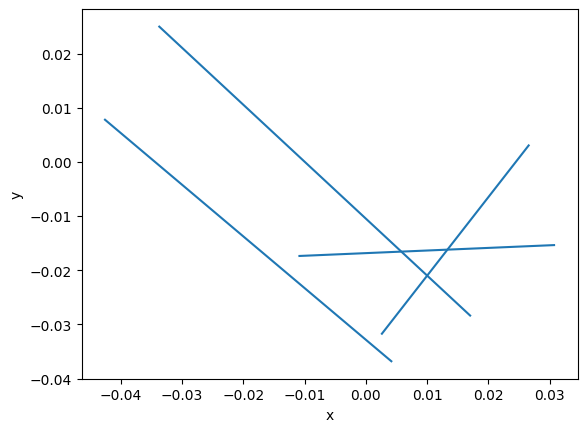

In [8]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

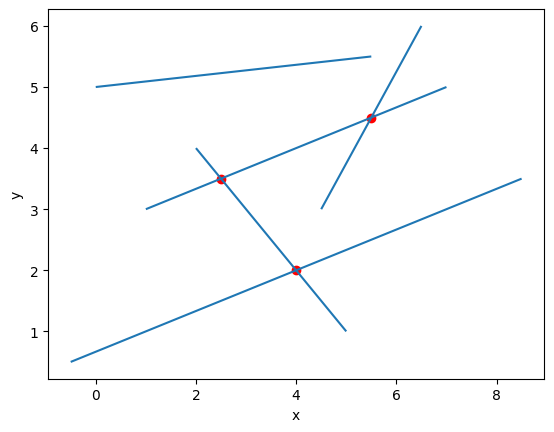

In [9]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [10]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """

    def generate_different(max_val, diff_set, n):
        tab = []

        while len(tab) < n:
            val = np.random.rand(1)[0] * max_val
            if val not in diff_set:
                tab.append(val)

        return tab

    def generate_without_rep(max_val, n):
        s = set()
        tab = []

        while len(s) < n:
            val = np.random.rand(1)[0] * max_val
            if val not in s:
                s.add(val)
                tab.append(val)

        return tab

    x1 = list(np.random.rand(n) * max_x)
    x2 = generate_without_rep(max_x, n)
    y1 = list(np.random.rand(n) * max_y)
    y2 = generate_different(max_y, y1, n)

    return [((x1[i], y1[i]), (x2[i], y2[i])) for i in range(n)]    

In [11]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 3.000s


In [13]:
section = generate_uniform_sections(200, 200, 10)

Zwizualizuj otrzymane odcinki

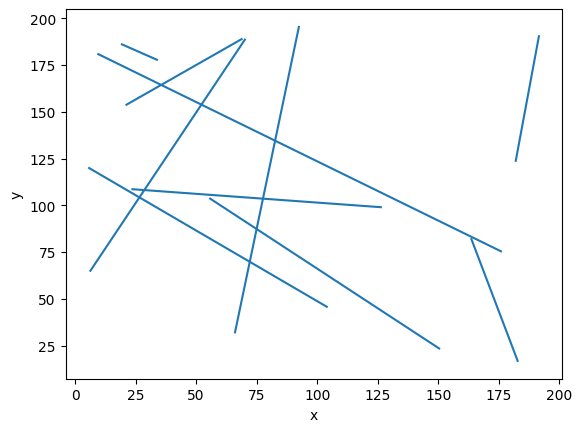

In [14]:
def draw_sections(sections):
    vis = Visualizer()

    vis.add_line_segment(sections)
    vis.show()


draw_sections(section)

# Interfejs do rysowania odcinków

### Konstrukor SegmentBuilder(file_name, load)

file_name --- nazwa pliku, którego będziemy używać do zapisu/odczytu zbioru odcinków. Jeśli nazwa nie zostanie podana, program wybierze nazwę segment-1, jeśli w lokalnym folderze nie ma żadnych plików zaczynających się od prefiksu "segment-", w przeciwnym wypadku zostanie wybrany największy z numerów "segment-" powiększony o 1.

load --- wartość True/False oznaczająca czy chcemy wczytać wielokąt z pliku podanego w file_name (True - wczytaj zbiór odcinków, False - nie wczytuj).

### Najważniejsze funkcje

show --- wyświetla pole do zadawania odcinków

load --- wczytuje zbiór odcinków z pliku podanego w konstruktorze

save --- zapisuje wprowadzone odcinki do pliku podanego w konstruktorze

get_segments --- zwraca wprowadzony zbiór odcinków

clear--- czyści pole do rysowania odcinków

undo --- usuwa ostatni dodany odcinek

### Dodatkowo funkcje clear, undo oraz save można wywołać z klawiatury:

clear --- C

undo --- U

save --- S

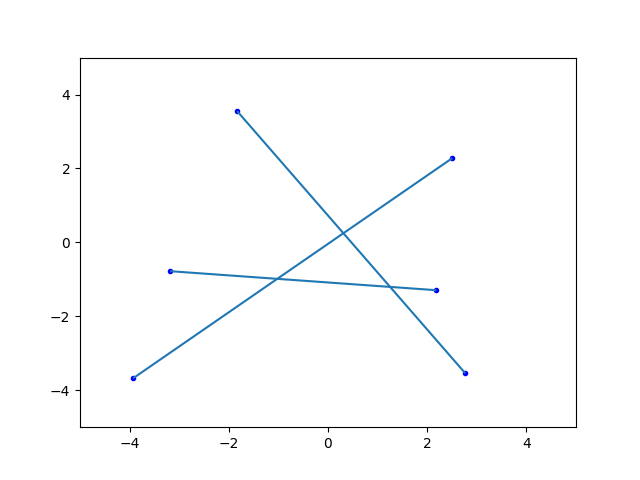

In [15]:
%matplotlib widget
from segment_builder import SegmentBuilder

segment_builder = SegmentBuilder(file_name="segment-2.txt", load=True)
segment_builder.show()

In [16]:
plt.close('all')
%matplotlib inline

Uzupełnij funkcję ```is_intersection```

In [17]:
def det(a, b, c, d):
    return a * d - b * c

class EventType(Enum):
    BEGIN = 0
    END = 1
    INTERSECT = 2

class Event:
    def __init__(self, position, type, segment_id=None, end_position=None, intersect_ids=None):
        self.position = position
        self.segment_id = segment_id
        self.end_position = end_position
        self.type = type
        self.intersect_ids = intersect_ids

        if self.end_position:
            self.vector = (self.end_position[0] - self.position[0], self.end_position[1] - self.position[1])

    def __eq__(self, other):
        if self.type != other.type:
            return False
        
        if self.type == EventType.INTERSECT:
            return min(self.intersect_ids) == min(other.intersect_ids) and max(self.intersect_ids) == max(other.intersect_ids)
        
        return self.segment_id == other.segment_id
    
    def __hash__(self):
        if self.type == EventType.INTERSECT:
            return hash((min(self.intersect_ids), max(self.intersect_ids), self.type))
        return hash((self.segment_id, self.segment_id, self.type))
    
    def __str__(self):
        if self.type == EventType.INTERSECT:
            return f"{self.type} {min(self.intersect_ids)} {max(self.intersect_ids)}"
        return f"{self.type} {self.segment_id}"
    
    def __repr__(self):
        if self.type == EventType.INTERSECT:
            return f"{self.type} {min(self.intersect_ids)} {max(self.intersect_ids)}"
        return f"{self.type} {self.segment_id}"


    @staticmethod
    def cmp_xs(event_1, event_2):
        event_1_x, event_1_y = event_1.position
        event_2_x, event_2_y = event_2.position

        if event_1_x != event_2_x:
            return event_1_x-event_2_x

        return event_2_y-event_1_y
    
    @staticmethod
    def get_sweep_intersect(e):
        if not e.end_position:
            return e.position[1]

        A = e.position[0]

        global sweep_x
        global previous_sweep_x
        global use_previous

        x = previous_sweep_x if use_previous else sweep_x

        t = (x - A) / e.vector[0]

        return e.position[1] + t * e.vector[1]

    @staticmethod
    def cmp_ys(event_1, event_2):
        EPS = 1e-10
        p1_y = Event.get_sweep_intersect(event_1)
        p2_y = Event.get_sweep_intersect(event_2)

        if p2_y - p1_y > EPS:
            return 1
        if p2_y - p1_y < -EPS:
            return -1

        return 0

    @staticmethod
    def get_intersect(event_1, event_2):
        if event_1 is None or event_2 is None:
            return None
        if event_1.type == EventType.INTERSECT or event_2.type == EventType.INTERSECT:
            return None

        Ax, Ay = event_1.position
        Cx, Cy = event_2.position

        ABx, ABy = event_1.vector

        CDx, CDy = event_2.vector

        W = det(CDx, -ABx, CDy, -ABy)

        if W == 0:
            return None
        
        Wt = det(Ax-Cx, -ABx, Ay-Cy, -ABy)
        t = Wt/W

        Wm = det(CDx, Ax-Cx, CDy, Ay-Cy)
        m = Wm/W

        p = (Cx + t * CDx, Cy + t * CDy)

        if 0 <= t and t <= 1 and 0 <= m and m <= 1:
            return Event(position=p, type=EventType.INTERSECT, intersect_ids=[event_1.segment_id, event_2.segment_id])
        return None


class State:
    def __init__(self, cmp_fun):
        self.cmp_fun = cmp_fun
        self.state = SortedSet(key=cmp_to_key(cmp_fun))

    def insert(self, e):
        if e is None:
            return
        if e.type == EventType.INTERSECT and e in self.state:
            return
        
        self.state.add(e)

    def remove(self, e):
        if e is None:
            return

        self.state.remove(e)
    
    def get_neighbours(self, e):
        if e is None:
            return [None, None]

        ix = self.state.index(e)
        
        return [self.state[ix - 1] if ix - 1 >= 0 else None, self.state[ix + 1] if ix + 1 < len(self.state) else None]
    

class Sweep(State):
    def __init__(self, cmp_fun):
        super().__init__(cmp_fun)


class EventsState(State):
    def __init__(self, cmp_fun):
        super().__init__(cmp_fun)
        self.current_ix = 0
    
    def next(self):
        self.current_ix += 1
        return self.state[self.current_ix-1]
    
    def has_next(self):
        return len(self.state) > self.current_ix
    
    def get_intersects(self):
        return [(e.position, *e.intersect_ids) for e in self.state if e.type == EventType.INTERSECT]
    


In [26]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    
    global sweep_x
    global previous_sweep_x
    global use_previous

    use_previous = False
    previous_sweep_x = None
    sweep_x = None
    

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    sweep_x = None

    while events.has_next():
        e = events.next()
        previous_sweep_x = sweep_x
        sweep_x = e.position[0]

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)
            prev, nxt = sweep.get_neighbours(e)

            events_to_check = [(e, prev), (e, nxt)]


        if e.type == EventType.END:
            e_begin = Event(position=e.position, end_position=e.end_position, type=EventType.BEGIN, segment_id=e.segment_id)

            prev, nxt = sweep.get_neighbours(e_begin)
            sweep.remove(e_begin)

            events_to_check = [(prev, nxt)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            if p:
                return True

    return False

In [27]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.005s


### W jaki sposób zaimplementowałeś strukturę stanu (stan miotły) oraz strukturę zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [28]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    
    global sweep_x
    global previous_sweep_x
    global use_previous

    use_previous = False
    previous_sweep_x = None
    sweep_x = None
    
    vis = Visualizer()
    vis.add_line_segment(sections, color="grey")

    sweep_bounds = (min([min(val[0][1], val[1][1]) for val in sections]), max([max(val[0][1], val[1][1]) for val in sections]))
    

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    
    segment_lines = {}

    while events.has_next():
        e = events.next()
        previous_sweep_x = sweep_x
        sweep_x = e.position[0]

        sweep_line = vis.add_line_segment(((e.position[0], sweep_bounds[0]), (e.position[0], sweep_bounds[1])), color="red")

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)

            segment_lines[e.segment_id] = vis.add_line_segment((e.position, e.end_position))

            prev, nxt = sweep.get_neighbours(e)

            events_to_check = [(e, prev), (e, nxt)]


        if e.type == EventType.END:
            begin_event = Event(position=e.position, end_position=e.end_position, type=EventType.BEGIN, segment_id=e.segment_id)

            prev, nxt = sweep.get_neighbours(begin_event)
            sweep.remove(begin_event)

            vis.remove_figure(segment_lines[e.segment_id])

            events_to_check = [(prev, nxt)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            if p:
                vis.add_line_segment(((e1.position, e1.end_position), (e2.position, e2.end_position)), color="green")
                vis.add_point(p.position, color="green")
                return True, vis
            
        vis.remove_figure(sweep_line)

    return False, vis

In [29]:
_, vis = is_intersection_with_visualization(example_line_segments_1)
vis.save_gif("is_int_4", interval=500)

Uzupełnij funkcję ```find_intersections```

In [24]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    
    global sweep_x
    global previous_sweep_x
    global use_previous

    use_previous = False
    previous_sweep_x = None
    sweep_x = None

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)


    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)


    while events.has_next():
        e = events.next()
        previous_sweep_x = sweep_x
        sweep_x = e.position[0]

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)
            prev, nxt = sweep.get_neighbours(e)

            events_to_check = [(prev, e), (e, nxt)]

        if e.type == EventType.END:
            begin_event = Event(position=e.position, end_position=e.end_position, type=EventType.BEGIN, segment_id=e.segment_id)
            
            prev, nxt = sweep.get_neighbours(begin_event)
            sweep.remove(begin_event)

            events_to_check = [(prev, nxt)]

        if e.type == EventType.INTERSECT:
            prev_ix, nxt_ix = e.intersect_ids
            prev = Event(position = sections[prev_ix][0], end_position=sections[prev_ix][1], type=EventType.BEGIN, segment_id=prev_ix)
            nxt = Event(position = sections[nxt_ix][0], end_position=sections[nxt_ix][1], type=EventType.BEGIN, segment_id=nxt_ix)
            
            use_previous = True
            sweep.remove(prev)
            sweep.remove(nxt)
            use_previous = False

            sweep.insert(nxt)
            sweep.insert(prev)

            prev_neigh_1, prev_neigh_2 = sweep.get_neighbours(prev)
            nxt_neigh_1, nxt_neigh_2 = sweep.get_neighbours(nxt)

            events_to_check = [(prev_neigh_1, prev), (prev, prev_neigh_2), (nxt_neigh_1, nxt), (nxt, nxt_neigh_2)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            events.insert(p)

    return [(a, b+1, c+1) for a, b, c in events.get_intersects()]

In [25]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.005s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [22]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    
    global sweep_x
    global previous_sweep_x
    global use_previous

    use_previous = False
    previous_sweep_x = None
    sweep_x = None


    vis = Visualizer()
    vis.add_line_segment(sections, color="grey")

    sweep_bounds = (min([min(val[0][1], val[1][1]) for val in sections]), max([max(val[0][1], val[1][1]) for val in sections]))
    
    segment_lines = {}

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    while events.has_next():
        e = events.next()
        previous_sweep_x = sweep_x
        sweep_x = e.position[0]

        sweep_line = vis.add_line_segment(((e.position[0], sweep_bounds[0]), (e.position[0], sweep_bounds[1])), color="red")

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)
            prev, nxt = sweep.get_neighbours(e)

            segment_lines[e.segment_id] = vis.add_line_segment((e.position, e.end_position))

            events_to_check = [(prev, e), (e, nxt)]

        if e.type == EventType.END:
            begin_event = Event(position=e.position, end_position=e.end_position, type=EventType.BEGIN, segment_id=e.segment_id)
            
            prev, nxt = sweep.get_neighbours(begin_event)

            sweep.remove(begin_event)

            vis.remove_figure(segment_lines[e.segment_id])

            events_to_check = [(prev, nxt)]

        if e.type == EventType.INTERSECT:
            prev_ix, nxt_ix = e.intersect_ids
            prev = Event(position = sections[prev_ix][0], end_position=sections[prev_ix][1], type=EventType.BEGIN, segment_id=prev_ix)
            nxt = Event(position = sections[nxt_ix][0], end_position=sections[nxt_ix][1], type=EventType.BEGIN, segment_id=nxt_ix)
            
            use_previous = True
            sweep.remove(prev)
            sweep.remove(nxt)
            use_previous = False

            sweep.insert(nxt)
            sweep.insert(prev)

            prev_neigh_1, prev_neigh_2 = sweep.get_neighbours(prev)
            nxt_neigh_1, nxt_neigh_2 = sweep.get_neighbours(nxt)

            events_to_check = [(prev_neigh_1, prev), (prev, prev_neigh_2), (nxt_neigh_1, nxt), (nxt, nxt_neigh_2)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            events.insert(p)

            if p:
                l = vis.add_line_segment(((e1.position, e1.end_position), (e2.position, e2.end_position)), color="green")
                vis.add_point(p.position, color="green")
                vis.remove_figure(l)

        vis.remove_figure(sweep_line)

    return [(a, b+1, c+1) for a, b, c in events.get_intersects()], vis

In [23]:
_, vis = find_intersections_with_visualization(section)
vis.show_gif(interval=500)

#vis.save_gif("find_int_1", interval=500)